# Project

### Importing required libraries and loading required datasets

### Here we are using dateset of cancer 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Project.csv')
df

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


# Data cleaning and Preprocessing

In [5]:
df.isnull().sum()

id                   0
diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave points       0
symmetry             0
fractal dimension    0
dtype: int64

* Data cleaning is the process of identifying and correcting corrupt, incomplete, duplicated, incorrect, and irrelevant data from a reference set by using different methods and having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.
* Data preprocessing involves the transformation of the raw dataset into an understandable format. Preprocessing data is a fundamental stage to improve data efficiency. The data preprocessing methods directly affect the outcomes of any algorithm.

## Finding the highly correlated columns to decrease the size of data
### Representing all the correlation between all the features visually

<AxesSubplot:>

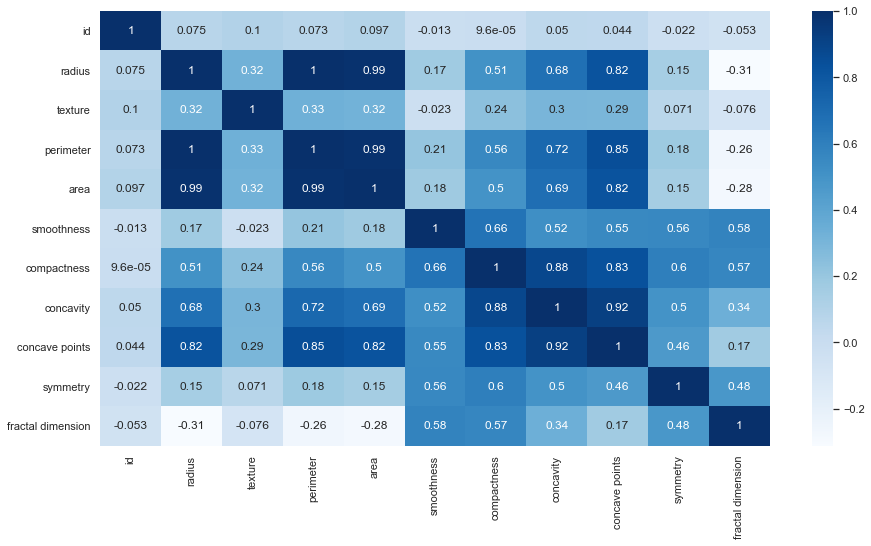

In [2]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,cmap="Blues")

## Removing unwanted columns

- **Removing column named 'id' since pandas index can used as unique value for every row** 
- **Removing column which are dependent on existing columns such as perimeter and area which are dependent on radius**
- **Removing which are not used in this analysis**

In [3]:
df = df.drop(['id', 'perimeter', 'area', 'concave points', 
              'fractal dimension', 'concavity'], axis=1)
df

,diagnosis,radius,texture,smoothness,compactness,symmetry
0,M,17.99,10.38,0.11840,0.27760,0.2419
1,M,20.57,17.77,0.08474,0.07864,0.1812
2,M,19.69,21.25,0.10960,0.15990,0.2069
3,M,11.42,20.38,0.14250,0.28390,0.2597
4,M,20.29,14.34,0.10030,0.13280,0.1809
...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.1726
565,M,20.13,28.25,0.09780,0.10340,0.1752
566,M,16.60,28.08,0.08455,0.10230,0.1590
567,M,20.60,29.33,0.11780,0.27700,0.2397


## Replacing diagnosis of patients with  
- **1 for 'M' since it is not curable must be of higher value** 
- **0 for 'B' since it is curable must be of higher value**

In [4]:
df['diagnosis'].replace('M', 1, inplace = True)
df['diagnosis'].replace('B', 0, inplace = True)
df

,diagnosis,radius,texture,smoothness,compactness,symmetry
0,1,17.99,10.38,0.11840,0.27760,0.2419
1,1,20.57,17.77,0.08474,0.07864,0.1812
2,1,19.69,21.25,0.10960,0.15990,0.2069
3,1,11.42,20.38,0.14250,0.28390,0.2597
4,1,20.29,14.34,0.10030,0.13280,0.1809
...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726
565,1,20.13,28.25,0.09780,0.10340,0.1752
566,1,16.60,28.08,0.08455,0.10230,0.1590
567,1,20.60,29.33,0.11780,0.27700,0.2397


## Checking for null values
* Here we are checking for null values and if there are no null values then we can proceed to the further steps but in case we have any null values present in the data set then we need use few techniques of data cleaning and preprocessing to fill the missing values or to remove them
* The techniques used are 
                         1.fillna 
                         2.dropna 
                         3.ffill 
                         4.bfill

In [5]:
df.isnull().sum()

diagnosis      0
radius         0
texture        0
smoothness     0
compactness    0
symmetry       0
dtype: int64

* There are no null values 

In [6]:
df.describe()

,diagnosis,radius,texture,smoothness,compactness,symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.181162
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.027414
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.106000
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.161900
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.179200
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.195700
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.304000


## Column Chart
* Column Charts are used for showing data changes over a period of time or for illustrating comparison among items. 
* In Column Charts, categories are along the horizontal axis and values along the vertical axis.
* Column charts are typically used to compare several items in a specific range of values. 
* Column charts are ideal if you need to compare a single category of data between individual sub-items
* Column charts work well in showing data changes over a period of time by displaying the comparisons among subjects on an overall chart.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

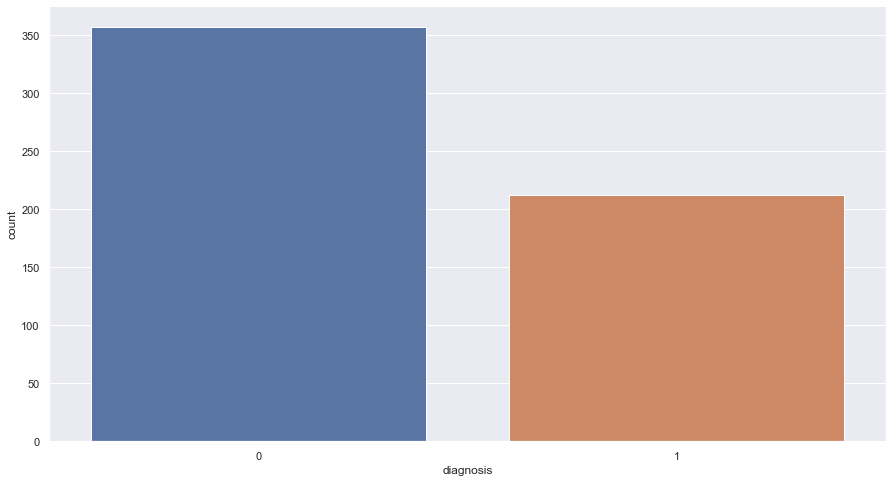

In [7]:
sns.countplot(x='diagnosis',data=df)

# Machine Learning 
Algorithms used for testing and training the model
* Support vector machine
* Logistic regression
* Descision Trees
* K nearest neighbours

## Testing and Training the model

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1), 
                                                    df['diagnosis'], test_size=0.30, 
                                                    random_state=101)

## Support vector machine
Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification and regression challenges but it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes.

In [9]:
# support vector machine
from sklearn.svm import SVC #importing the support vector machine model 
model=SVC() #initializing the support vector machine  model
model.fit(X_train,y_train) # training the model
predictions=model.predict(X_test) # predicting the glass types for test data

## Logistic regression
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.

In [10]:
from sklearn.linear_model import LogisticRegression #importing the logistic regression model
logmodel = LogisticRegression(max_iter=800) #initializing the logistic regression  model
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train) # training the  model
predictions1 = logmodel.predict(X_test) # predicting the glass types for test data

## Descision Trees
Decision Trees are a type of Supervised Machine Learning, where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes and the decision nodes are where the data is split.

In [11]:
#Descision Trees
from sklearn.tree import DecisionTreeClassifier # importing the descision trees model
model1 = DecisionTreeClassifier() # initializing the descision trees model
model1.fit(X_train, y_train) #traing the model
predictions2=model1.predict(X_test) # predicting the glass types for test data

## K nearest neighbours
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new data and available data and put the new data into the category that is most similar to the available categories.

In [12]:
#K nearest neighbours 
from sklearn.neighbors import KNeighborsClassifier # importing the K nearest neighbors model
classifier = KNeighborsClassifier(n_neighbors=5) # initializing the K nearest neighbors model
classifier.fit(X_train, y_train)# training the model
y_pred = classifier.predict(X_test) # predicting the glass types for test data

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       105
           1       0.89      0.77      0.83        66

    accuracy                           0.88       171
   macro avg       0.88      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



In [15]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       105
           1       0.82      0.82      0.82        66

    accuracy                           0.86       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.86      0.86      0.86       171



In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       105
           1       0.83      0.80      0.82        66

    accuracy                           0.86       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.86      0.86      0.86       171



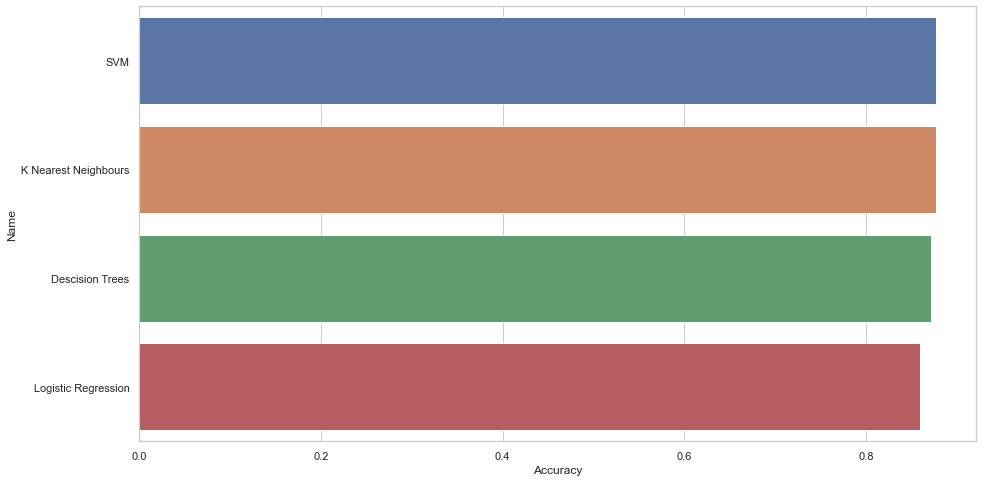

In [17]:
names=["SVM","K Nearest Neighbours","Descision Trees","Logistic Regression"]
classifiers=[model,logmodel,model1,classifier]

# creating List and storing the accuracy scores of the 4 different classifiiers in this list
accuracyScores= []
for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    accuracyScores.append(score)


#Creating a data frame with two columns,the name of the classifier and its respective  accuracy score
df2=pd.DataFrame()
df2["Name"]=names
df2["Accuracy"]=accuracyScores
#df2

#plotting barplots for the accuracy scores of the 4 different calssifiers
sns.set(style="whitegrid")
ax=sns.barplot(y="Name",x="Accuracy",data=df2)

### Here SVM Model gives high Accuracy so we will 